In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
from google.colab import files
uploaded = files.upload()


Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [3]:
!unzip brain_tumor_dataset.zip -d BrainTumorDataset


Archive:  brain_tumor_dataset.zip
   creating: BrainTumorDataset/brain_tumor_dataset/
   creating: BrainTumorDataset/brain_tumor_dataset/no/
  inflating: BrainTumorDataset/brain_tumor_dataset/no/1 no.jpeg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/10 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/11 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/12 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/13 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/14 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/15 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/17 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/18 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/19 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/2 no.jpeg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/20 no.jpg  
  inflating: BrainTumorDataset/brain_tumor_dataset/no/21 no.jpg  
 

In [4]:
# count the number of images in the respective classes 0- Brain Tumor and 1- healthy
ROOT_DIR = "/content/BrainTumorDataset/brain_tumor_dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('yes', 155), ('no', 98)])

In [5]:
os.listdir("/content/BrainTumorDataset/brain_tumor_dataset/yes")

['Y102.jpg',
 'Y166.JPG',
 'Y153.jpg',
 'Y106.jpg',
 'Y37.jpg',
 'Y154.jpg',
 'Y28.jpg',
 'Y58.JPG',
 'Y27.jpg',
 'Y76.jpg',
 'Y6.jpg',
 'Y165.JPG',
 'Y78.jpg',
 'Y96.jpg',
 'Y187.jpg',
 'Y259.JPG',
 'Y158.JPG',
 'Y195.JPG',
 'Y2.jpg',
 'Y55.jpg',
 'Y114.JPG',
 'Y256.JPG',
 'Y163.JPG',
 'Y29.jpg',
 'Y20.jpg',
 'Y82.jpg',
 'Y182.JPG',
 'Y244.JPG',
 'Y193.JPG',
 'Y33.jpg',
 'Y252.jpg',
 'Y17.jpg',
 'Y104.jpg',
 'Y32.jpg',
 'Y70.jpg',
 'Y31.jpg',
 'Y69.jpg',
 'Y188.jpg',
 'Y186.jpg',
 'Y35.jpg',
 'Y148.JPG',
 'Y95.jpg',
 'Y30.jpg',
 'Y146.JPG',
 'Y155.JPG',
 'Y51.jpg',
 'Y242.JPG',
 'Y15.jpg',
 'Y250.jpg',
 'Y18.JPG',
 'Y248.JPG',
 'Y8.jpg',
 'Y25.jpg',
 'Y156.JPG',
 'Y39.jpg',
 'Y60.jpg',
 'Y107.jpg',
 'Y71.JPG',
 'Y50.JPG',
 'Y46.jpg',
 'Y45.JPG',
 'Y1.jpg',
 'Y183.jpg',
 'Y73.jpg',
 'Y16.JPG',
 'Y111.JPG',
 'Y159.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y247.JPG',
 'Y112.JPG',
 'Y23.JPG',
 'Y42.jpg',
 'Y74.jpg',
 'Y56.jpg',
 'Y19.JPG',
 'Y181.jpg',
 'Y26.jpg',
 'Y53.jpg',
 'Y120.JPG',
 'Y9.jp

# We will split the data such that


*   70 % for train data
*   15 % for validation
*   15 % for testing



In [6]:
def dataFolder(p,split):
  number_of_images = {
        dir: len(os.listdir(os.path.join(ROOT_DIR, dir)))
        for dir in os.listdir(ROOT_DIR)
  }

    # Création du dossier train si n'existe pas
  if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./" + p + "/" + dir, exist_ok=True)

            all_images = os.listdir(os.path.join(ROOT_DIR, dir))
            n_total = len(all_images)
            n_sample = math.floor(split * n_total) - 5

            # Sécurité : éviter n_sample négatif ou supérieur à n_total
            n_sample = max(0, min(n_sample, n_total))

            selected = np.random.choice(all_images, size=n_sample, replace=False)

            for img in selected:
                src = os.path.join(ROOT_DIR, dir, img)
                dst = os.path.join("./" + p, dir, img)
                shutil.copy2(src, dst)  # Copie sécurisée
  else:
    print(f"{p} folder already exists.")

In [7]:
dataFolder("test", 0.15)

In [8]:
dataFolder("train", 0.7)

In [9]:
dataFolder("val", 0.15)

# Model build

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [20]:
# CNN Model
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Preparing our data using Data Generator

In [25]:
def preprocessingImages1(path):
  """
  input : Path
  output :Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image


In [26]:
path="/content/train"
train_data=preprocessingImages1(path)


Found 166 images belonging to 2 classes.


In [27]:
def preprocessingImages2(path):
  """
  input : Path
  output :Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image


In [44]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 27 images belonging to 2 classes.


In [31]:
path="/content/val"
val_data=preprocessingImages2(path)


Found 27 images belonging to 2 classes.


In [32]:
# Early stopping and model check point
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto')

# Model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

# Model Training

In [35]:
history =model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
  )

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/8 ━━━━━━━━━━━━━━━━━━━━ 1:25 12s/step - accuracy: 0.5926 - loss: 0.6873

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.5926 - loss: 0.6873 - val_accuracy: 0.6667 - val_loss: 0.6712
Epoch 2/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 1:00 9s/step - accuracy: 0.6667 - loss: 0.6430
Epoch 2: val_accuracy improved from 0.66667 to 0.88889, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.6667 - loss: 0.6430 - val_accuracy: 0.8889 - val_loss: 0.4898
Epoch 3/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.8889 - loss: 0.4880
Epoch 3: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8889 - loss: 0.4880 - val_accuracy: 0.8519 - val_loss: 0.4542
Epoch 4/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8519 - loss: 0.4731
Epoch 4: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8519 - loss: 0.4731 - val_accuracy: 0.8889 - val_loss: 0.3795
Epoch 5/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8519 - loss: 0.4050
Epoch 5: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8519 - loss: 0.4050 - val_accuracy: 0.8889 - val_loss: 0.3473
Epoch 5: early stopping


In [36]:
h= history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

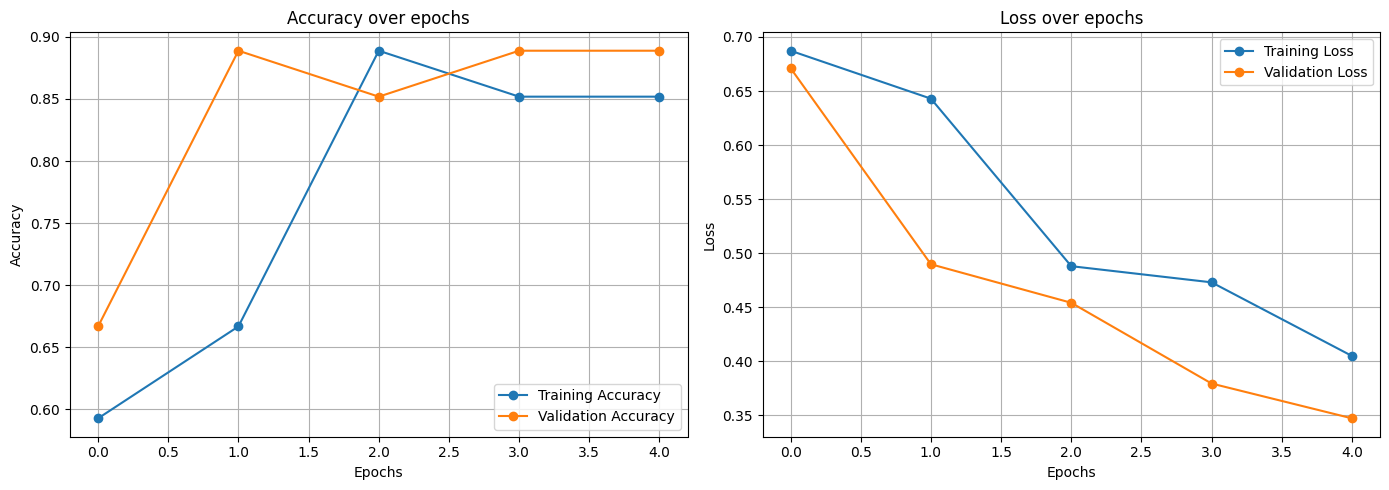

In [42]:
# Model Graphical Interpretation

import matplotlib.pyplot as plt
plt.style.use('default')
# Récupération des valeurs d'entraînement et de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Création de la figure
plt.figure(figsize=(14, 5))

# Précision (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Perte (Loss)
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [43]:
# Model Accuracy
from tensorflow.keras.models import load_model

model = load_model('/content/best_model.h5')

# Model Accuracy

In [48]:
acc=model.evaluate(test_data)[1]

print(f"The accuracy of the model is {acc*100} %")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7037 - loss: 0.5700
The accuracy of the model is 70.37037014961243 %


In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


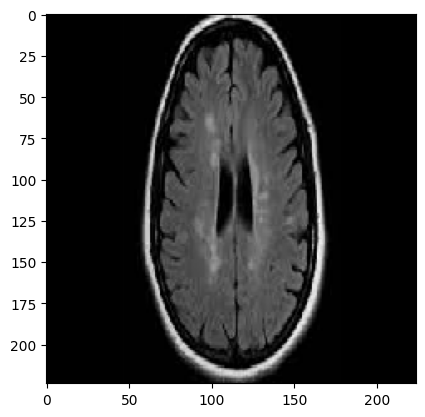

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction score: 0.4351447
✅ No brain tumor detected


In [57]:
path="/content/BrainTumorDataset/brain_tumor_dataset/no/13 no.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr = np.expand_dims(input_arr,axis =0)  # Convert single image to a batch.
predictions = model.predict(input_arr)[0][0]
predictions

print("Prediction score:", predictions)
if predictions > 0.5:
    print("⚠️ Brain tumor detected")
else:
    print("✅ No brain tumor detected")